In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv('/content/marketing_campaign.csv', header=0, sep='\t')
df.head(3).T

,0,1,2
ID,5524,2174,4141
Year_Birth,1957,1954,1965
Education,Graduation,Graduation,Graduation
Marital_Status,Single,Single,Together
Income,58138.0,46344.0,71613.0
Kidhome,0,1,0
Teenhome,0,1,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013
Recency,58,38,26
MntWines,635,11,426


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From the information above, we can see that 'Income' has missing values. It's shows from the count, other columns has 2240 non-null and 'Income' only has 2216. It means that 'Income' has 24 missing values. We can check the missing value from each column below.

In [4]:
missing_value = print("missing value: ", df.isna().sum())
missing_value

missing value:  ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [5]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


And yes, we can confirm that 'Income' has 24 missing values. There are a lot of ways to handling missing value. For this one, I'll use inputation with median, because we're not checking the outlier yet.

In [6]:
df['Income']=df['Income'].fillna(df['Income'].median())

In [7]:
df['Income'].isna().sum()

0

Now, that we've handled missing values through inputation. Let's go to the next step, checking for duplicated data.

In [8]:
duplicated = print("Duplicated data: ", df.duplicated().sum())

Duplicated data:  0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


From the description above, 'Income' and 'Year_Birth' has a big difference between mean and max. This might be indicative of an outlier. To make it clear, we'll conduct a boxplot analysis to identify and visualize any potential outliers in the dataset.

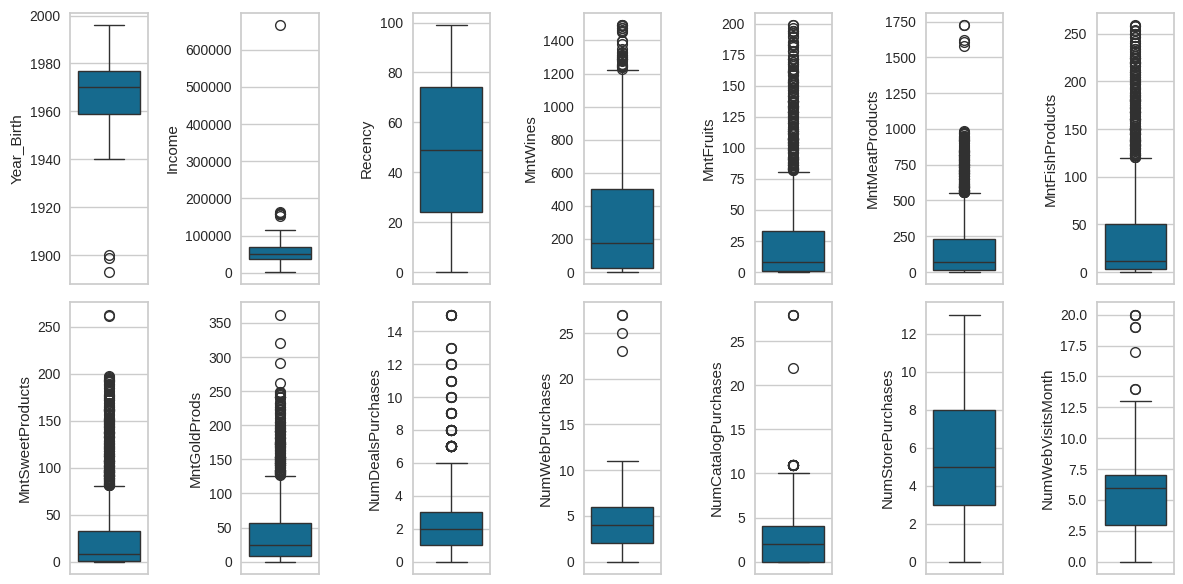

In [10]:
outlier = ['Year_Birth','Income','Recency','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
plt.figure(figsize=(12, 6))
for i in range(0, len(outlier)):
  plt.subplot(2,7,i+1)
  sns.boxplot(y = df[outlier[i]])
  plt.tight_layout()

From the boxplot analysis, we can see that max value in 'Income' is extreme value, because the different from other outlier is so big. For 'Year_Birth', it's also seems that the lower one is the extreme value. We'll handling that missing values using IQR.

Previous Shape With Outlier:  (2240, 29)
Shape After Removing Outliers: (2240, 29)


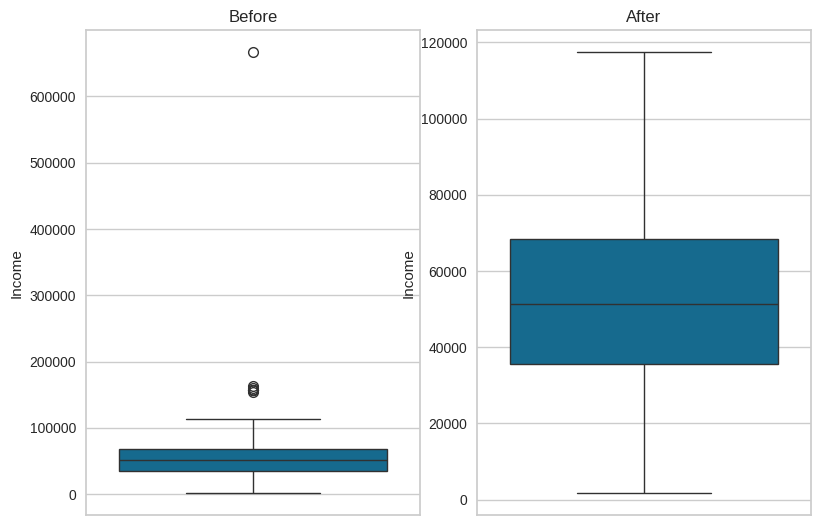

In [11]:
fig, axes = plt.subplots(1,2)
plt.tight_layout()
print("Previous Shape With Outlier: ", df.shape)
sns.boxplot(df['Income'], orient='v', ax=axes[0])
axes[0].title.set_text("Before")

Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
low_bound = Q1 - 1.5*IQR
high_bound = Q3 + 1.5*IQR
total_outlier = np.sum((df.loc[:, 'Income'] < low_bound)|(df.loc[:, 'Income'] > high_bound))
df2 = df
df2['Income'] = np.where(df2['Income'] > high_bound, high_bound, df2['Income'])
df2['Income'] = np.where(df2['Income'] < low_bound, low_bound, df2['Income'])

print("Shape After Removing Outliers:", df2.shape)
sns.boxplot(df2['Income'], orient='v', ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Previous Shape With Outlier:  (2240, 29)
Shape After Removing Outliers: (2240, 29)


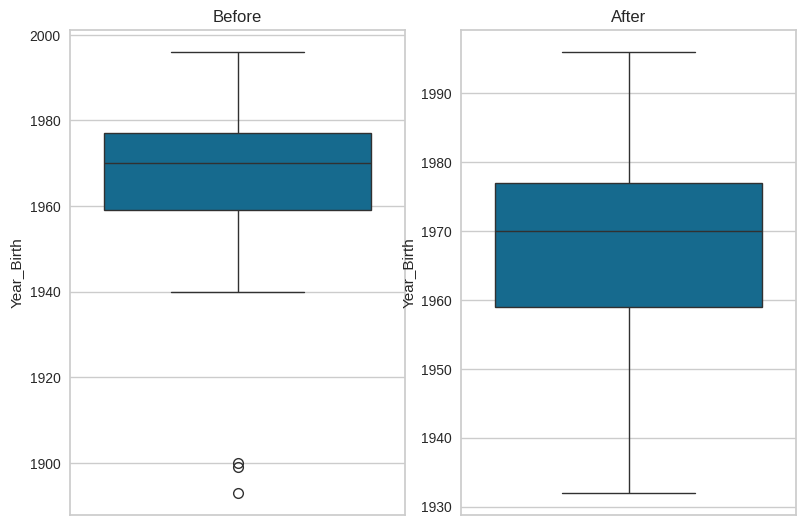

In [12]:
fig, axes = plt.subplots(1,2)
plt.tight_layout()
print("Previous Shape With Outlier: ", df.shape)
sns.boxplot(df['Year_Birth'], orient='v', ax=axes[0])
axes[0].title.set_text("Before")

Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
low_bound = Q1 - 1.5*IQR
high_bound = Q3 + 1.5*IQR
total_outlier = np.sum((df.loc[:, 'Year_Birth'] < low_bound)|(df.loc[:, 'Year_Birth'] > high_bound))
df2 = df
df2['Year_Birth'] = np.where(df2['Year_Birth'] > high_bound, high_bound, df2['Year_Birth'])
df2['Year_Birth'] = np.where(df2['Year_Birth'] < low_bound, low_bound, df2['Year_Birth'])

print("Shape After Removing Outliers:", df2.shape)
sns.boxplot(df2['Year_Birth'], orient='v', ax=axes[1])
axes[1].title.set_text("After")
plt.show()

#Feature Engineering

After preparing the data, we'll change the data type and do some data aggregation. Because I'll perform customer segmentation using RFM (Recency, Frequency, and Monetery), I'll aggregate the data to calculate Frequency and Monetery, since this data already has Recency.

In [13]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

<ipython-input-13-5ede84e7ffb2>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [14]:
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [15]:
df['Age'] = 2024 - df['Year_Birth']

In [16]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [17]:
df['Age_Desc'] = np.where(df['Age'] < 31, 'Young',
                          np.where(df['Age'] < 45, 'Adult',
                                   'Old'))

In [18]:
df['Seniority'] = 2024 - df['Dt_Customer'].dt.year

In [19]:
df['Promotion'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['Promotion'].value_counts()

0    1777
1     325
2      83
3      44
4      11
Name: Promotion, dtype: int64

In [20]:
df['Frequency'] = df.loc[:,df.columns.str.contains("Purchases")].sum(axis=1)

In [21]:
df['Monetary'] = df.loc[:,df.columns.str.contains("Mnt")].sum(axis=1)

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.00
Year_Birth,2240.0,1968.852232,11.771725,1932.0,1959.00,1970.0,1977.00,1996.00
Income,2240.0,51865.874554,20936.104821,1730.0,35538.75,51381.5,68289.75,117416.25
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.00
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.00
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.00
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.00
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.00
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.00
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.00


For further analysis, I'll focus on utilizing specific features and grouping them based on numerical and categorical attributes.

In [23]:
Numerical = ['Income','Recency','Age','Children','Monetary', 'Frequency']
Categorical = df.loc[:,(df.dtypes == 'object')].columns.tolist()

In [24]:
df[Numerical].describe(include='all')

,Income,Recency,Age,Children,Monetary,Frequency
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51865.874554,49.109375,55.147768,0.950446,605.798214,14.862054
std,20936.104821,28.962453,11.771725,0.751803,602.249288,7.677173
min,1730.000000,0.000000,28.000000,0.000000,5.000000,0.000000
25%,35538.750000,24.000000,47.000000,0.000000,68.750000,8.000000
50%,51381.500000,49.000000,54.000000,1.000000,396.000000,15.000000
75%,68289.750000,74.000000,65.000000,1.000000,1045.500000,21.000000
max,117416.250000,99.000000,92.000000,3.000000,2525.000000,44.000000


In [25]:
df[Categorical].describe(include='all')

,Education,Marital_Status,Age_Desc
count,2240,2240,2240
unique,5,8,3
top,Graduation,Married,Old
freq,1127,864,1816


From the numerical and categorical attributes, we gained valuable information such as:
1. The highest recorded recency is 99. It's indicating that the most recent purchase for some customers occurred 99 days ago (Around 3 months)
2. Most of the customer made 15 purchases and the highest recorded is 44 purchases. Also there are customer who have not made a purchase (0 purchase)
3. Most of the customer are married


#RFM Analysis

In [26]:
rfm = df[['ID', 'Recency', 'Frequency', 'Monetary']]
rfm.head(3)

,ID,Recency,Frequency,Monetary
0,5524,58,25,1617
1,2174,38,6,27
2,4141,26,21,776


In [27]:
rfm['Recency_score'] = pd.qcut(rfm['Recency'], 5, labels = [5,4,3,2,1])
rfm['Frequency_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels = [1,2,3,4,5])
rfm['Monetary_score'] = pd.qcut(rfm['Monetary'], 5, labels = [5,4,3,2,1])
rfm['rfm_score'] = rfm[['Recency_score','Frequency_score','Monetary_score']].sum(axis=1)
rfm.head(3)

<ipython-input-27-d715f8cef142>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Recency_score'] = pd.qcut(rfm['Recency'], 5, labels = [5,4,3,2,1])
<ipython-input-27-d715f8cef142>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Frequency_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels = [1,2,3,4,5])
<ipython-input-27-d715f8cef142>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,ID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,rfm_score
0,5524,58,25,1617,3,5,1,9
1,2174,38,6,27,4,1,5,10
2,4141,26,21,776,4,4,2,10


In [28]:
Customer_Desc = ['Platinum', 'Bronze', 'Silver', 'Gold']
Score_cat = pd.qcut(rfm.rfm_score, q = 4, labels = Customer_Desc)
rfm['Customer_Desc'] = Score_cat.values

<ipython-input-28-80ca6229ef14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Customer_Desc'] = Score_cat.values


In [29]:
rfm.head(3)

,ID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,rfm_score,Customer_Desc
0,5524,58,25,1617,3,5,1,9,Bronze
1,2174,38,6,27,4,1,5,10,Silver
2,4141,26,21,776,4,4,2,10,Silver


In [30]:
rfm.groupby('Customer_Desc').agg({
    'Recency': ['mean','min','max','count'],
    'Frequency':['mean','min','max','count'],
    'Monetary':['mean','min','max','count']
})

Recency                Frequency                  Monetary  \
                    mean min max count       mean min max count        mean   
Customer_Desc                                                                 
Platinum       76.829909  19  99   876  14.319635   0  37   876  694.009132   
Bronze         49.461883   0  98   446  14.813901   0  43   446  614.928251   
Silver         30.100000   0  78   450  14.788889   0  44   450  575.293333   
Gold           15.164530   0  57   468  15.993590   1  35   468  461.316239   

                               
              min   max count  
Customer_Desc                  
Platinum        6  2524   876  
Bronze          5  2525   446  
Silver          6  2352   450  
Gold            8  2349   468

From the table above, we can gain information such as:
1. **Gold** customer has the lowest recency, highest frequency and lowest monetary. This indicates their loyalty as customers, it's reflected in their frequent product purchases and short transaction periods.
2. **Silver** customer has  low recency, low frequency, and low monetary. This indicates their loyalty too. Despite having the low monetary value, they have a high frequency of purchases and engage in transactions over relatively short periods.
3. **Bronze** customer has moderate recency, low frequency, and high monetary. They may not make frequent purchases, but when they do, they contribute to the high value of their transactions.
4. **Platinum** customer has the highest recency, low frequency, and higher monetary. Their frequent is small and long transaction periods, but when they do, they contribute to the high value of their transaction.

#K-Means Clustering

In [31]:
df_rfm = rfm[['Recency', 'Frequency', 'Monetary']]

In [32]:
scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(df_rfm)
rfm_scaled = pd.DataFrame(rfm_scaled, columns=df_rfm.columns)


X_train, X_test = train_test_split(rfm_scaled, test_size=0.2, random_state=42)

In [33]:
rfm_scaled

,Recency,Frequency,Monetary
0,0.585859,0.568182,0.639683
1,0.383838,0.136364,0.008730
2,0.262626,0.477273,0.305952
3,0.262626,0.181818,0.019048
4,0.949495,0.431818,0.165476
...,...,...,...
2235,0.464646,0.409091,0.530159
2236,0.565657,0.500000,0.174206
2237,0.919192,0.431818,0.490476
2238,0.080808,0.522727,0.332540


In [34]:
inertia = []
K_values = range(2,11)

for k in K_values:
  kmeans = KMeans(n_clusters = k, random_state = 123)
  kmeans.fit(rfm_scaled)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

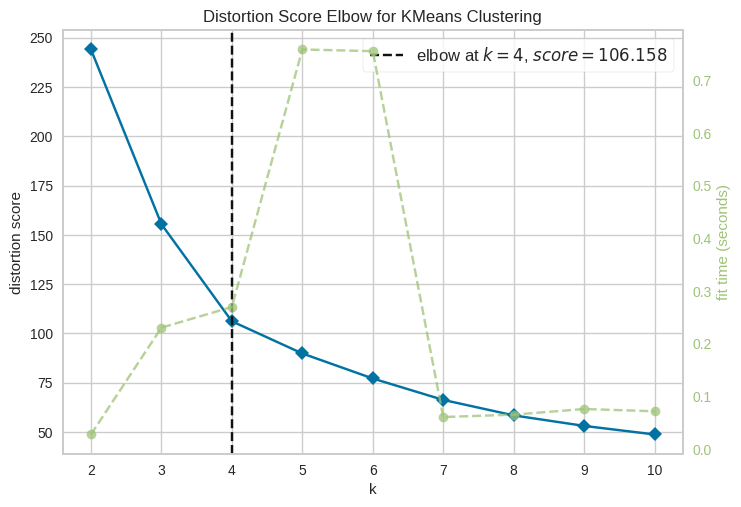

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
model = KMeans(random_state = 123)
visualizer = KElbowVisualizer(model, timings=True, locate_elbow=True)
visualizer.fit(rfm_scaled)
visualizer.show()

From the plot above, we know that the optimal number of clusters (k) is 4. So, we're gonna use k = 4.

In [36]:
kmeans = KMeans(n_clusters=4, random_state = 123)
kmeans.fit(rfm_scaled.values)
rfm_scaled['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
rfm_scaled.head(3)

,Recency,Frequency,Monetary,cluster
0,0.585859,0.568182,0.639683,2
1,0.383838,0.136364,0.008730,0
2,0.262626,0.477273,0.305952,3


In [38]:
rfm['cluster'] = kmeans.labels_

<ipython-input-38-15a23668eebd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['cluster'] = kmeans.labels_


In [39]:
rfm.head(3)

,ID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,rfm_score,Customer_Desc,cluster
0,5524,58,25,1617,3,5,1,9,Bronze,2
1,2174,38,6,27,4,1,5,10,Silver,0
2,4141,26,21,776,4,4,2,10,Silver,3


In [40]:
print('Cluster Count:')
print(rfm['cluster'].value_counts())

Cluster Count:
0    648
1    620
2    508
3    464
Name: cluster, dtype: int64


<ipython-input-41-bca08bb6be86>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = rfm.cluster, y = rfm.Recency, palette='muted')


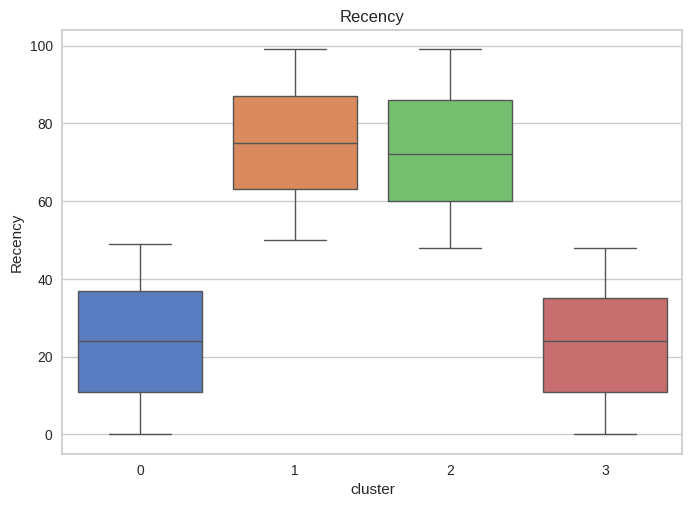

In [41]:
sns.boxplot(x = rfm.cluster, y = rfm.Recency, palette='muted')
plt.title('Recency')
plt.show()

<ipython-input-42-7a8a85d53ca5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = rfm.cluster, y = rfm.Frequency, palette='muted')


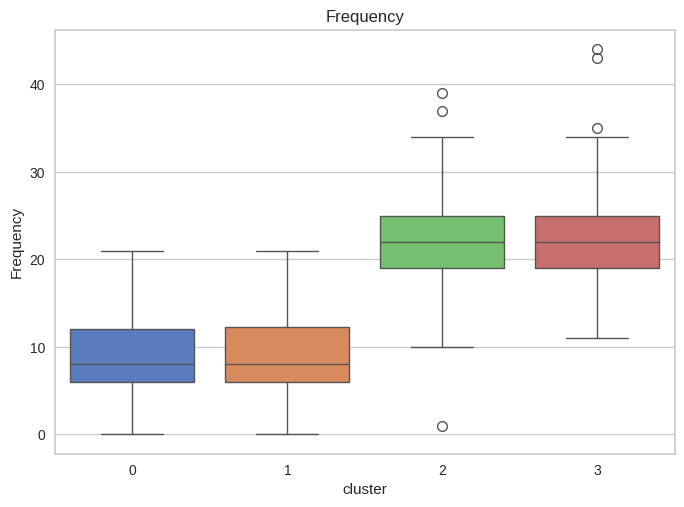

In [42]:
sns.boxplot(x = rfm.cluster, y = rfm.Frequency, palette='muted')
plt.title('Frequency')
plt.show()

<ipython-input-43-c7e9e7a3fd80>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = rfm.cluster, y = rfm.Monetary, palette='muted')


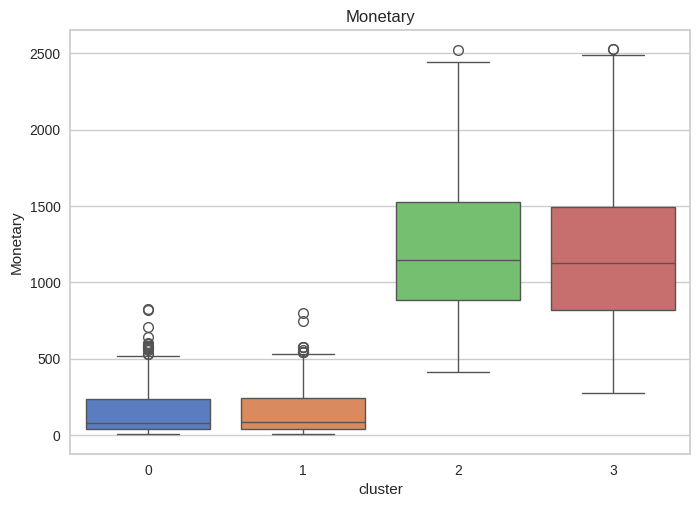

In [43]:
sns.boxplot(x = rfm.cluster, y = rfm.Monetary, palette='muted')
plt.title('Monetary')
plt.show()

In [44]:
df['cluster'] = rfm['cluster']
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Age,Children,Age_Desc,Seniority,Promotion,Frequency,Monetary,cluster
0,5524,1957.0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,11,1,67.0,0,Old,12,0,25,1617,2
1,2174,1954.0,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,11,0,70.0,2,Old,10,0,6,27,0
2,4141,1965.0,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,59.0,0,Old,11,0,21,776,3


In [45]:
rfm.groupby('cluster').agg({
    'Recency': ['mean','min','max','count'],
    'Frequency':['mean','min','max','count'],
    'Monetary':['mean','min','max','count']
})

Recency                Frequency                   Monetary       \
              mean min max count       mean min max count         mean  min   
cluster                                                                       
0        24.256173   0  49   648   9.297840   0  21   648   153.155864    6   
1        74.635484  50  99   620   9.575806   0  21   620   156.203226    5   
2        73.147638  48  99   508  21.657480   1  39   508  1198.375984  415   
3        23.392241   0  48   464  22.256466  11  44   464  1189.918103  277   

                     
          max count  
cluster              
0         825   648  
1         801   620  
2        2524   508  
3        2525   464

From the table above, we can gain information such as:

1. **Cluster 0**  has low recency, low frequency and lowest monetary. This might indicate that they are new customers because the low recency and monetary.
2. **Cluster 1** customer has the highest recency, low frequency, and low monetary. Customer in this cluster can be categorized as at-risk customer because they have higher recency than the previous cluster while their frequency and monetary remain almost the same.
3. **Cluster 2** customer has high recency, high frequency, and the highest monetary. Customer in this cluster can be categorized as top spenders customer because of their significant spending
4. **Cluster 3** customer has the lowest recency, highest frequency, and high monetary. Customer in this cluster can be categorized as loyal customer. It's reflected in their frequent transactions with high monetary amounts

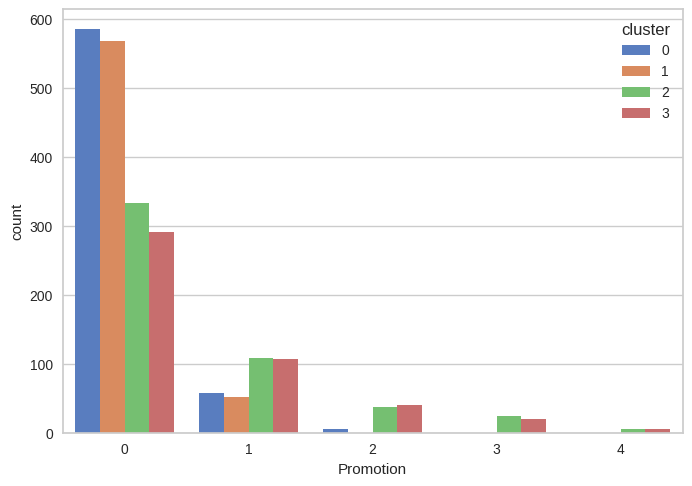

In [46]:
hue_order = [0,1,2,3]
sns.countplot(x = 'Promotion', hue = 'cluster', data = df, palette = 'muted', hue_order = hue_order)
plt.show()

Text(0.5, 1.0, 'Scatterplot Income vs Monetary')

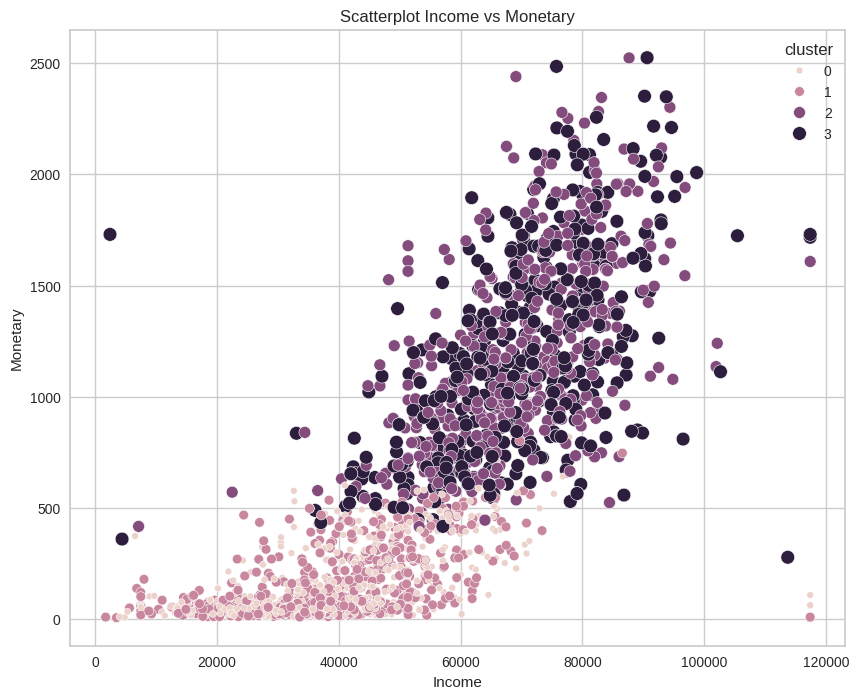

In [47]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df, x='Income', y='Monetary', hue='cluster', size='cluster')
plt.title('Scatterplot Income vs Monetary')

In [48]:
df[["cluster","Income","Monetary"]].groupby(["cluster"]).agg(["mean","count","min","max"])

Income                              Monetary                 
                 mean count     min        max         mean count  min   max
cluster                                                                     
0        38136.358410   648  4023.0  117416.25   153.155864   648    6   825
1        38259.518548   620  1730.0  117416.25   156.203226   620    5   801
2        69455.359744   508  7144.0  117416.25  1198.375984   508  415  2524
3        69963.307112   464  2447.0  117416.25  1189.918103   464  277  2525

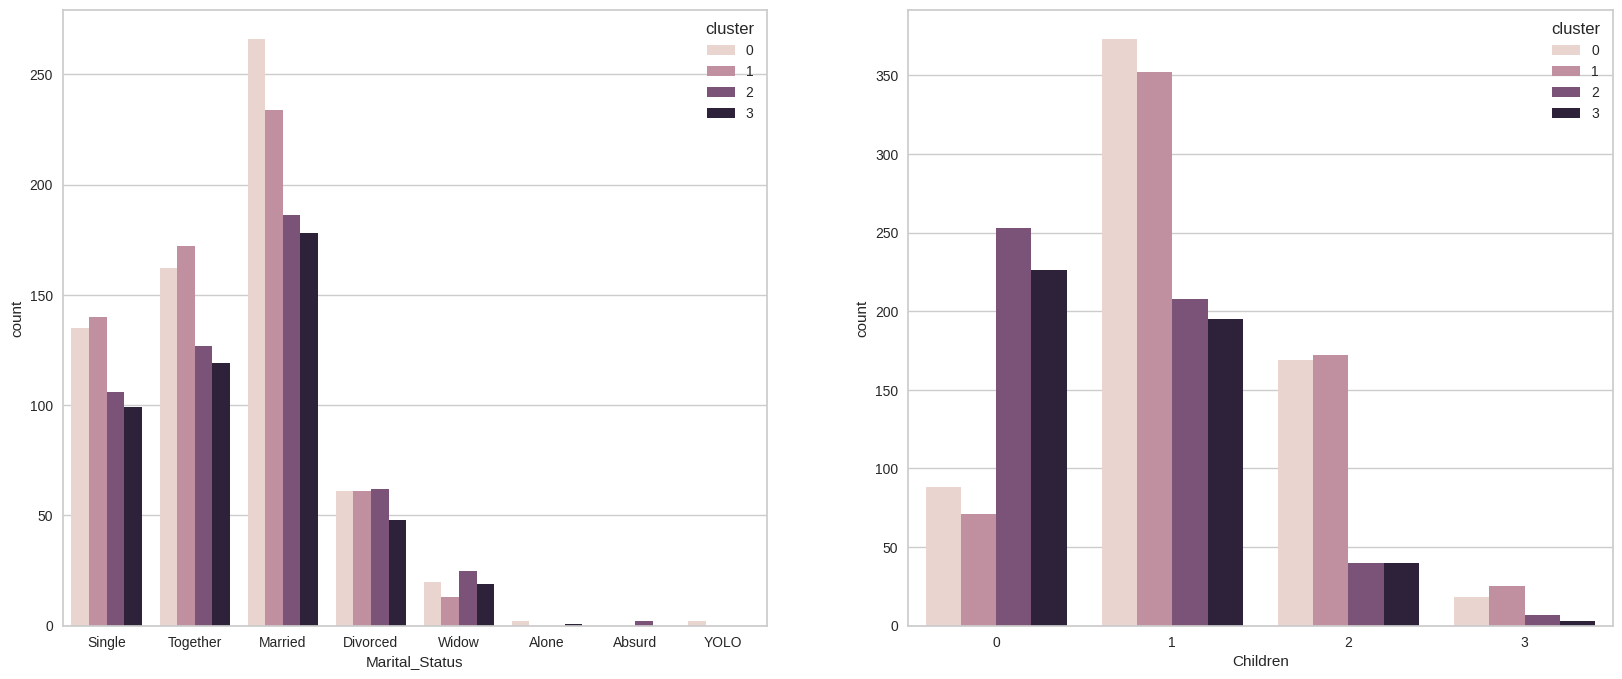

In [49]:
hue_order = [0,1,2,3]
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(ax=axes[0], x='Marital_Status', hue='cluster', data=df, hue_order=hue_order)
sns.countplot(ax=axes[1], x='Children', hue='cluster', data=df, hue_order=hue_order)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

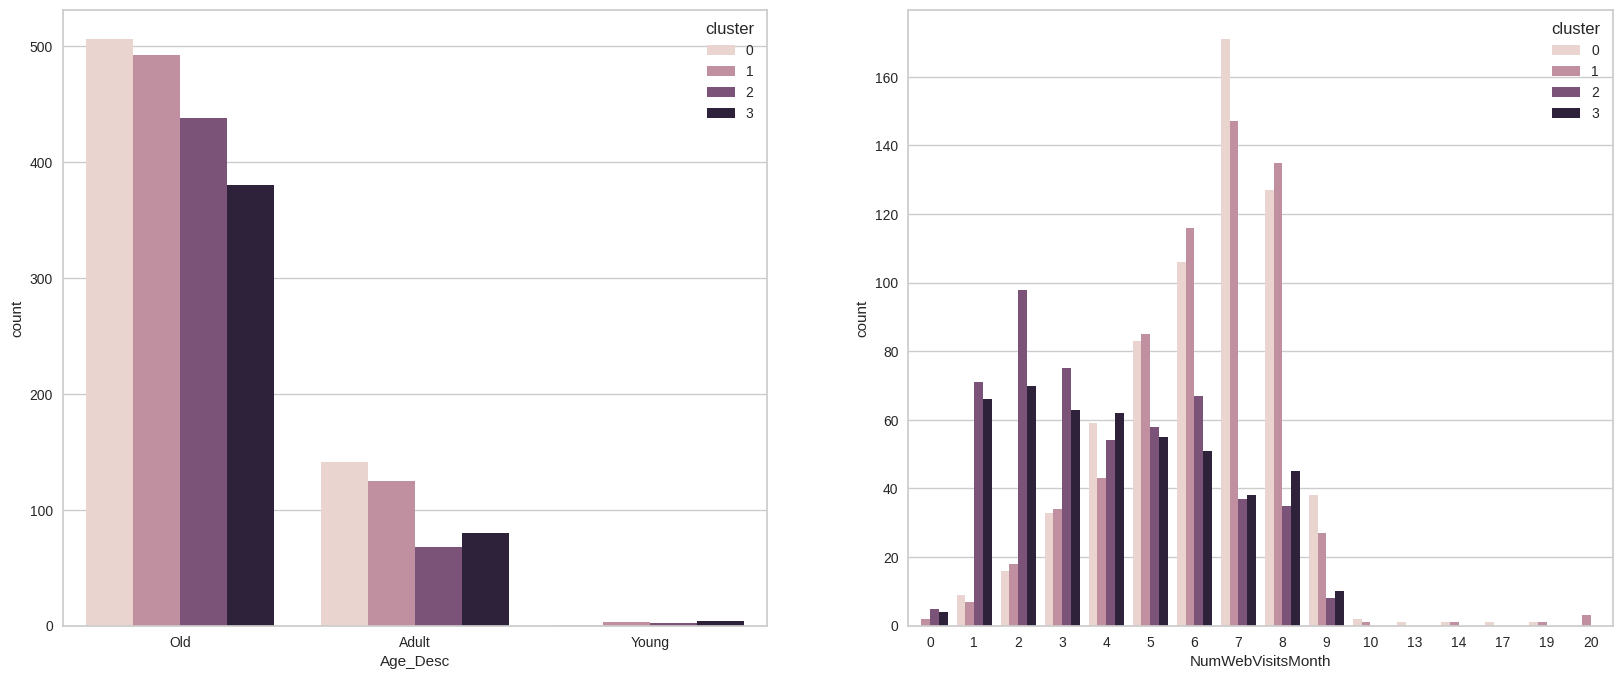

In [50]:
hue_order = [0,1,2,3]
fig, axes = plt.subplots(1,2, figsize = (20,8))
sns.countplot(ax=axes[0], x='Age_Desc', hue='cluster', data=df, hue_order=hue_order)
sns.countplot(ax=axes[1], x='NumWebVisitsMonth', hue='cluster', data=df, hue_order=hue_order)
plt.show